In [2]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\82106\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [3]:
# S&P 500 상위 100개 주식의 티커 리스트 (예시로 사용)
tickers = [
    'AAPL', 'MSFT', 'AMZN', 'FB', 'GOOGL', 'GOOG', 'BRK-B', 'JNJ', 'JPM', 'V', 
    'PG', 'T', 'MA', 'DIS', 'XOM', 'BAC', 'VZ', 'INTC', 'WMT', 'MRK', 
    'PFE', 'CSCO', 'HD', 'KO', 'CVX', 'PEP', 'CMCSA', 'ORCL', 'ABBV', 'PM',
    'LLY', 'ABT', 'UNH', 'ACN', 'NFLX', 'MCD', 'MDT', 'NKE', 'IBM', 'TMO',
    'BA', 'MMM', 'AMGN', 'TXN', 'HON', 'SBUX', 'NEE', 'BMY', 'LIN', 'LOW',
    'C', 'CHTR', 'GILD', 'DHR', 'FIS', 'AMD', 'QCOM', 'BLK', 'UNP', 'INTU',
    'UPS', 'COST', 'CVS', 'LMT', 'GS', 'TGT', 'ISRG', 'NOW', 'AMT', 'DE',
    'MS', 'CAT', 'BKNG', 'ADBE', 'SPGI', 'SCHW', 'GE', 'CI', 'SYK', 'MO',
    'MDLZ', 'AXP', 'USB', 'TJX', 'D', 'MU', 'ZTS', 'RTX', 'PNC', 'NSC',
    'ANTM', 'GM', 'CB', 'CME', 'CL', 'PLD', 'LRCX', 'SO', 'BDX', 'ADI'
]

In [4]:
import yfinance as yf
import pandas as pd

# 날짜 범위 설정
start_date = '2020-01-01'
end_date = '2020-12-31'

# 데이터 프레임을 생성하고 각 주식의 데이터를 다운로드
data = pd.DataFrame()
for ticker in tickers:
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    data[ticker] = stock_data['Adj Close']

# 데이터 확인
print(data.head())

# 데이터를 CSV 파일로 저장
data.to_csv('stock_data.csv')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['FB']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********

                 AAPL        MSFT       AMZN  FB      GOOGL       GOOG  \
Date                                                                     
2020-01-02  72.960457  154.215652  94.900497 NaN  68.433998  68.368500   
2020-01-03  72.251137  152.295441  93.748497 NaN  68.075996  68.032997   
2020-01-06  72.826851  152.689056  95.143997 NaN  69.890503  69.710503   
2020-01-07  72.484352  151.296875  95.343002 NaN  69.755501  69.667000   
2020-01-08  73.650345  153.706802  94.598503 NaN  70.251999  70.216003   

                 BRK-B         JNJ         JPM           V  ...  ANTM  \
Date                                                        ...         
2020-01-02  228.389999  130.099136  123.533607  185.208755  ...   NaN   
2020-01-03  226.179993  128.592880  121.903412  183.735764  ...   NaN   
2020-01-06  226.990005  128.432419  121.806473  183.338440  ...   NaN   
2020-01-07  225.919998  129.216766  119.735710  182.853867  ...   NaN   
2020-01-08  225.990005  129.198959  120.669

### per 다운로드후 파일로 저장

In [5]:
financial_info = {}

for ticker in tickers:
    stock = yf.Ticker(ticker)
    try:
        info = stock.info
        financial_info[ticker] = {
            'PER': info.get('trailingPE', None),  # None을 기본값으로 사용하여 값이 없는 경우 None을 반환
        }
    except ValueError:  # 정보를 가져오는 중 문제가 발생한 경우 예외 처리
        financial_info[ticker] = {
            'PER': None
        }
        print(f"Failed to fetch data for {ticker}")

print(financial_info)

# 딕셔너리를 DataFrame으로 변환
df_financial_info = pd.DataFrame(list(financial_info.items()), columns=['Ticker', 'PER'])

# DataFrame 확인
print(df_financial_info)

# DataFrame을 CSV 파일로 저장
df_financial_info.to_csv('per_values.csv', index=False)

{'AAPL': {'PER': 29.482918}, 'MSFT': {'PER': 36.350346}, 'AMZN': {'PER': 51.882023}, 'FB': {'PER': None}, 'GOOGL': {'PER': 27.044546}, 'GOOG': {'PER': 27.191717}, 'BRK-B': {'PER': 12.299114}, 'JNJ': {'PER': 22.97771}, 'JPM': {'PER': 12.359082}, 'V': {'PER': 31.331099}, 'PG': {'PER': 27.392157}, 'T': {'PER': 9.354838}, 'MA': {'PER': 36.616547}, 'DIS': {'PER': 112.22826}, 'XOM': {'PER': 14.661765}, 'BAC': {'PER': 13.548276}, 'VZ': {'PER': 15.003745}, 'INTC': {'PER': 32.81443}, 'WMT': {'PER': 27.746782}, 'MRK': {'PER': 144.16484}, 'PFE': {'PER': None}, 'CSCO': {'PER': 16.273647}, 'HD': {'PER': 23.101343}, 'KO': {'PER': 25.313251}, 'CVX': {'PER': 14.965041}, 'PEP': {'PER': 27.479637}, 'CMCSA': {'PER': 10.416446}, 'ORCL': {'PER': 32.58575}, 'ABBV': {'PER': 49.529762}, 'PM': {'PER': 19.498047}, 'LLY': {'PER': 113.56932}, 'ABT': {'PER': 32.42679}, 'UNH': {'PER': 32.048256}, 'ACN': {'PER': 27.549}, 'NFLX': {'PER': 43.102013}, 'MCD': {'PER': 23.141886}, 'MDT': {'PER': 27.27619}, 'NKE': {'PER': 

### 베타값 다운로드후 저장

직접 계산

In [6]:
import yfinance as yf
import pandas as pd
import numpy as np

# 날짜 범위 설정
start_date = '2020-01-01'
end_date = '2020-12-31'

# S&P 500 지수 데이터 가져오기
market_index = yf.Ticker('^GSPC')
market_data = market_index.history(start=start_date, end=end_date)
market_data = market_data['Close'].resample('M').ffill().pct_change()

# 값을 저장할 딕셔너리 초기화
beta_values = {}

for ticker in tickers:
    stock = yf.Ticker(ticker)
    try:
        # 주식 데이터 가져오기
        stock_data = stock.history(start=start_date, end=end_date)
        stock_data = stock_data['Close'].resample('M').ffill().pct_change()
        
        # 주식과 시장 지수의 월간 수익률 계산
        combined_data = pd.concat([stock_data, market_data], axis=1).dropna()
        combined_data.columns = ['Stock', 'Market']
        
        # 베타 계산
        cov_matrix = np.cov(combined_data['Stock'], combined_data['Market'])
        beta = cov_matrix[0, 1] / cov_matrix[1, 1]
        
        beta_values[ticker] = beta
    except Exception as e:  # 정보를 가져오는 중 문제가 발생한 경우 예외 처리
        beta_values[ticker] = None
        print(f"Failed to fetch data for {ticker}: {e}")

# 딕셔너리를 DataFrame으로 변환
df_beta_values = pd.DataFrame(list(beta_values.items()), columns=['Ticker', 'Beta'])

# DataFrame 확인
print(df_beta_values)

C:\Users\82106\AppData\Local\Temp\ipykernel_22316\4199116028.py:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  market_data = market_data['Close'].resample('M').ffill().pct_change()
C:\Users\82106\AppData\Local\Temp\ipykernel_22316\4199116028.py:22: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  stock_data = stock_data['Close'].resample('M').ffill().pct_change()
C:\Users\82106\AppData\Local\Temp\ipykernel_22316\4199116028.py:22: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  stock_data = stock_data['Close'].resample('M').ffill().pct_change()
C:\Users\82106\AppData\Local\Temp\ipykernel_22316\4199116028.py:22: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  stock_data = stock_data['Close'].resample('M').ffill().pct_change()
FB: No timezone found, symbol may be delisted
C:\U

Failed to fetch data for FB: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'


C:\Users\82106\AppData\Local\Temp\ipykernel_22316\4199116028.py:22: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  stock_data = stock_data['Close'].resample('M').ffill().pct_change()
C:\Users\82106\AppData\Local\Temp\ipykernel_22316\4199116028.py:22: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  stock_data = stock_data['Close'].resample('M').ffill().pct_change()
C:\Users\82106\AppData\Local\Temp\ipykernel_22316\4199116028.py:22: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  stock_data = stock_data['Close'].resample('M').ffill().pct_change()
C:\Users\82106\AppData\Local\Temp\ipykernel_22316\4199116028.py:22: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  stock_data = stock_data['Close'].resample('M').ffill().pct_change()
C:\Users\82106\AppData\Local\Temp\ipykernel_22316\41

Failed to fetch data for ANTM: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'


C:\Users\82106\AppData\Local\Temp\ipykernel_22316\4199116028.py:22: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  stock_data = stock_data['Close'].resample('M').ffill().pct_change()
C:\Users\82106\AppData\Local\Temp\ipykernel_22316\4199116028.py:22: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  stock_data = stock_data['Close'].resample('M').ffill().pct_change()
C:\Users\82106\AppData\Local\Temp\ipykernel_22316\4199116028.py:22: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  stock_data = stock_data['Close'].resample('M').ffill().pct_change()
C:\Users\82106\AppData\Local\Temp\ipykernel_22316\4199116028.py:22: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  stock_data = stock_data['Close'].resample('M').ffill().pct_change()
C:\Users\82106\AppData\Local\Temp\ipykernel_22316\41

   Ticker      Beta
0    AAPL  1.281428
1    MSFT  0.681100
2    AMZN  0.859518
3      FB       NaN
4   GOOGL  0.990363
..    ...       ...
95    PLD  0.533921
96   LRCX  1.090380
97     SO  0.559367
98    BDX  0.528945
99    ADI  1.079023

[100 rows x 2 columns]


yfinance 에서 베타값 가져오는 코드

In [7]:
# 베타값을 저장할 딕셔너리 초기화
beta_values = {}

for ticker in tickers:
    stock = yf.Ticker(ticker)
    try:
        info = stock.info
        beta_values[ticker] = info.get('beta', None)  # 베타값 수집
    except ValueError:  # 정보를 가져오는 중 문제가 발생한 경우 예외 처리
        beta_values[ticker] = None
        print(f"Failed to fetch data for {ticker}")

# 딕셔너리를 DataFrame으로 변환
df_beta_values = pd.DataFrame(list(beta_values.items()), columns=['Ticker', 'Beta'])

# DataFrame 확인
print(df_beta_values)

# DataFrame을 CSV 파일로 저장
df_beta_values.to_csv('df_beta_values.csv', index=False)

   Ticker   Beta
0    AAPL  1.264
1    MSFT  0.893
2    AMZN  1.155
3      FB    NaN
4   GOOGL  1.019
..    ...    ...
95    PLD  1.058
96   LRCX  1.511
97     SO  0.476
98    BDX  0.468
99    ADI  1.144

[100 rows x 2 columns]


In [8]:
df_beta_values

,Ticker,Beta
0,AAPL,1.264
1,MSFT,0.893
2,AMZN,1.155
3,FB,NaN
4,GOOGL,1.019
...,...,...
95,PLD,1.058
96,LRCX,1.511
97,SO,0.476
98,BDX,0.468


In [9]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 결측치가 있는 행 제거
df_beta_values.dropna(subset=['Beta'], inplace=True)

# 클러스터링을 위해 'Beta' 열만 선택
X = df_beta_values[['Beta']]

# KMeans 모델 생성 및 학습
kmeans = KMeans(n_clusters=5, random_state=0).fit(X)

# 클러스터 레이블 추가
df_beta_values['Cluster'] = kmeans.labels_

# 결과 출력
print(df_beta_values)

   Ticker   Beta  Cluster
0    AAPL  1.264        3
1    MSFT  0.893        0
2    AMZN  1.155        3
4   GOOGL  1.019        0
5    GOOG  1.019        0
..    ...    ...      ...
95    PLD  1.058        0
96   LRCX  1.511        2
97     SO  0.476        1
98    BDX  0.468        1
99    ADI  1.144        3

[98 rows x 3 columns]


베타값이 클러스터링 테스트 하여 분산이 잘 되는지 확인

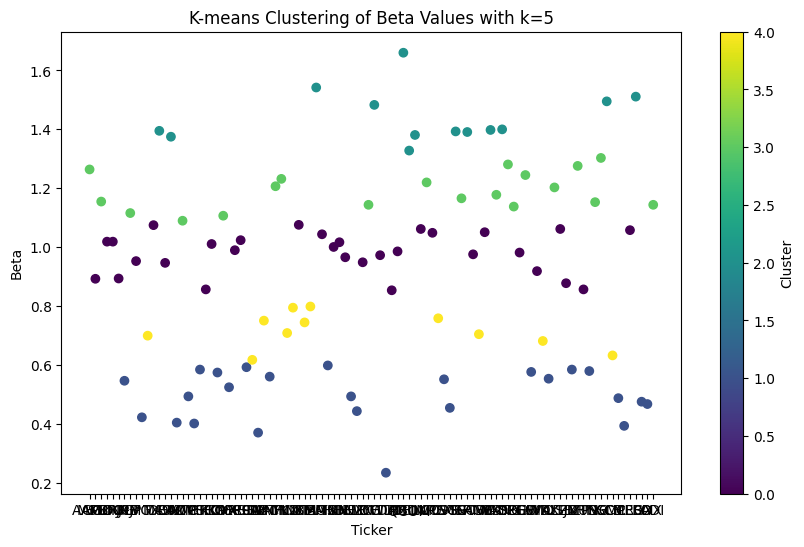

In [10]:
# 클러스터링 결과 시각화
plt.figure(figsize=(10, 6))
plt.scatter(df_beta_values['Ticker'], df_beta_values['Beta'], c=df_beta_values['Cluster'], cmap='viridis')
plt.xlabel('Ticker')
plt.ylabel('Beta')
plt.title('K-means Clustering of Beta Values with k=5')
plt.colorbar(label='Cluster')
plt.show()

적절하게 클러스터가 형성되는것을 볼수있다

### 배당 수익률 다운로드

In [11]:
# 배당수익률을 저장할 딕셔너리 초기화
dividend_yields = {}

for ticker in tickers:
    stock = yf.Ticker(ticker)
    try:
        info = stock.info
        # 배당수익률 수집, 배당수익률이 없는 경우 None으로 처리
        dividend_yields[ticker] = info.get('dividendYield', None) * 100 if info.get('dividendYield') is not None else None
    except ValueError:  # 정보를 가져오는 중 문제가 발생한 경우 예외 처리
        dividend_yields[ticker] = None
        print(f"Failed to fetch data for {ticker}")

# 딕셔너리를 DataFrame으로 변환
df_dividend_yields = pd.DataFrame(list(dividend_yields.items()), columns=['Ticker', 'DividendYield'])

# DataFrame 확인
print(df_dividend_yields)

   Ticker  DividendYield
0    AAPL           0.53
1    MSFT           0.71
2    AMZN            NaN
3      FB            NaN
4   GOOGL           0.45
..    ...            ...
95    PLD           3.44
96   LRCX           0.88
97     SO           3.62
98    BDX           1.61
99    ADI           1.72

[100 rows x 2 columns]


In [12]:
# DataFrame을 CSV 파일로 저장
df_dividend_yields.to_csv('dividend_yields.csv', index=False)

### 거래량 다운로드

In [13]:
# 각 티커에 대해 데이터 다운로드
data = yf.download(tickers, start="2023-01-01", end="2023-04-01")

# 거래량만 추출
volume_data = data['Volume']

volume_data.head()

[*********************100%%**********************]  100 of 100 completed

2 Failed downloads:
['ANTM', 'FB']: Exception('%ticker%: No timezone found, symbol may be delisted')


Ticker,AAPL,ABBV,ABT,ACN,ADBE,ADI,AMD,AMGN,AMT,AMZN,...,TXN,UNH,UNP,UPS,USB,V,VZ,WMT,XOM,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2023-01-03,112117500,4937500,4171900,2250100,2229100,4475700,46851800,2594800,1812400,76706000,...,4294100,3525600,1766300,2206500,12795900,4202800,31330700,17249700,15146200,1840600
2023-01-04,89113600,4440400,4395500,2052400,2186800,3477900,47477100,1773800,1796000,68885100,...,6285300,5070400,1830900,1965100,16338400,6606200,28779500,13338300,18058400,1796100
2023-01-05,80962700,3516000,4896900,2477100,2081600,4750300,46159500,2056000,1495000,67930800,...,6876800,5497100,2317500,2736800,8364000,5246000,29987200,13274400,15946600,1560900
2023-01-06,87754700,5099100,3800400,1587000,2216600,3483400,70161300,2887800,1980200,83303400,...,6725900,4841300,3375200,3690100,8198300,6829700,26010400,21231900,16348100,1761200
2023-01-09,70790800,7833000,7277700,2181500,3133800,3734100,69741300,2160700,1727200,65266100,...,5733900,3702800,2259500,3214600,13170700,6294500,23062200,17756700,17964600,1700500


거래량 평균 계산

In [14]:
# 각 티커의 평균 거래량 계산
average_volumes = volume_data.mean()

print(average_volumes)

Ticker
AAPL    6.888900e+07
ABBV    6.343245e+06
ABT     5.172203e+06
ACN     2.416384e+06
ADBE    3.051076e+06
            ...     
V       6.287800e+06
VZ      2.044373e+07
WMT     1.963317e+07
XOM     1.699392e+07
ZTS     2.172282e+06
Length: 100, dtype: float64


In [15]:
# 평균 거래량 데이터를 'volume'이라는 열 이름으로 데이터 프레임 생성
average_volume_df = pd.DataFrame(average_volumes, columns=['volume'])

print(average_volume_df)

              volume
Ticker              
AAPL    6.888900e+07
ABBV    6.343245e+06
ABT     5.172203e+06
ACN     2.416384e+06
ADBE    3.051076e+06
...              ...
V       6.287800e+06
VZ      2.044373e+07
WMT     1.963317e+07
XOM     1.699392e+07
ZTS     2.172282e+06

[100 rows x 1 columns]


거래량 데이터에서 결측치 제거하기

In [16]:
average_volumes.isnull().sum()

2

In [17]:
# 결측치가 있는 행 제거
average_volumes_cleaned = average_volumes.dropna()

average_volumes_cleaned.isnull().sum()

0

In [18]:
# 인덱스를 해제하고 열 이름 변경
average_volumes = average_volumes_cleaned.reset_index().rename(columns={'index': 'Ticker', 'volume': 'Volume'})

# 결과 출력
print(average_volumes)

   Ticker             0
0    AAPL  6.888900e+07
1    ABBV  6.343245e+06
2     ABT  5.172203e+06
3     ACN  2.416384e+06
4    ADBE  3.051076e+06
..    ...           ...
93      V  6.287800e+06
94     VZ  2.044373e+07
95    WMT  1.963317e+07
96    XOM  1.699392e+07
97    ZTS  2.172282e+06

[98 rows x 2 columns]


In [19]:
# DataFrame을 CSV 파일로 저장
average_volumes.to_csv('average_volumes.csv', index=False)

### 변동성 다운로드

In [21]:
import yfinance as yf
import pandas as pd

# 데이터를 다운로드할 기간 설정
start_date = '2023-01-01'
end_date = '2023-12-31'

# 종목별로 데이터 다운로드 및 변동성 계산을 위한 빈 DataFrame 생성
volatility_df = pd.DataFrame()

# 각 종목에 대해 데이터 다운로드 및 변동성 계산
for ticker in tickers:
    # 데이터 다운로드
    data = yf.download(ticker, start=start_date, end=end_date)
    
    # 일별 수익률 계산
    daily_returns = data['Adj Close'].pct_change()
    
    # 변동성 계산 (일별 수익률의 표준편차)
    volatility = daily_returns.std()
    
    # 결과를 DataFrame에 추가
    new_row = pd.DataFrame({'Ticker': [ticker], 'Volatility': [volatility]})
    volatility_df = pd.concat([volatility_df, new_row], ignore_index=True)

# DataFrame 출력
print(volatility_df)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['FB']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********

   Ticker  Volatility
0    AAPL    0.012570
1    MSFT    0.015824
2    AMZN    0.020805
3      FB         NaN
4   GOOGL    0.019149
..    ...         ...
95    PLD    0.016672
96   LRCX    0.022521
97     SO    0.011885
98    BDX    0.012176
99    ADI    0.016489

[100 rows x 2 columns]


In [22]:
# DataFrame을 CSV 파일로 저장
volatility_df.to_csv('volatility_df.csv', index=False)

### RSI 지수 다운로드

In [23]:
import yfinance as yf
import pandas as pd

def calculate_rsi(data, window=14):
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window, min_periods=1).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window, min_periods=1).mean()

    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# 데이터 다운로드 기간 설정
start_date = '2023-01-01'
end_date = '2023-12-31'

# 결과 저장을 위한 DataFrame 생성
rsi_summary_df = pd.DataFrame()

for ticker in tickers:
    # yfinance를 통해 주식 데이터 다운로드
    data = yf.download(ticker, start=start_date, end=end_date)

    # RSI 계산
    rsi = calculate_rsi(data['Adj Close'])

    # 최근 50일의 RSI 평균 계산
    rsi_mean = rsi.tail(50).mean()

    # 결과를 새로운 DataFrame에 추가
    new_row = pd.DataFrame({'Ticker': [ticker], 'RSI': [rsi_mean]})
    rsi_summary_df = pd.concat([rsi_summary_df, new_row], ignore_index=True)

# 결과 출력
print(rsi_summary_df)



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['FB']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********

   Ticker        RSI
0    AAPL  60.891065
1    MSFT  61.321308
2    AMZN  61.228543
3      FB        NaN
4   GOOGL  53.160397
..    ...        ...
95    PLD  63.595179
96   LRCX  62.697293
97     SO  59.866629
98    BDX  44.862782
99    ADI  60.514308

[100 rows x 2 columns]


In [24]:
# DataFrame을 CSV 파일로 저장
rsi_summary_df.to_csv('average_rsi_df.csv', index=False)